In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [107]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # how many layers?
        # Input layer (4 features)-->
        # h1 (N) -->
        # h2 (N) -->
        # output(3 classes)
        
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [108]:
torch.manual_seed(32)
model = Model()

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
df = pd.read_csv("../Data/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [111]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


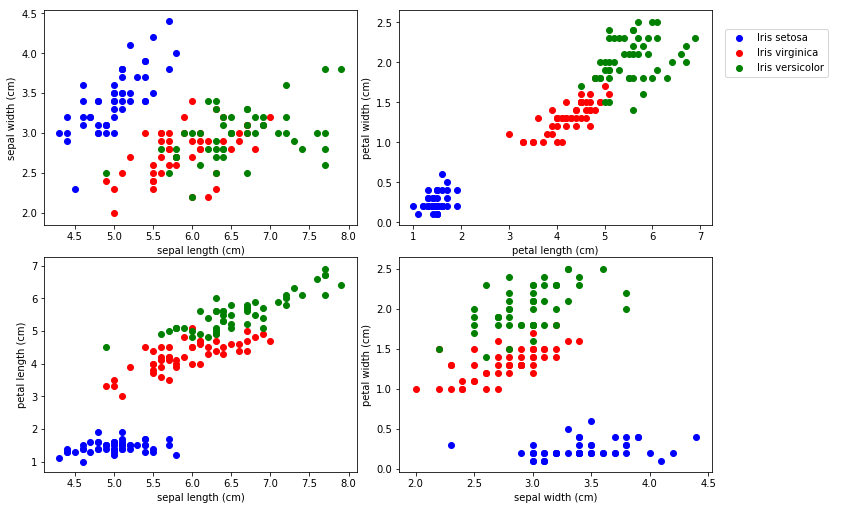

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [113]:
X = df.drop("target", axis=1)
y = df["target"]

In [114]:
X = X.values
y = y.values

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [117]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [118]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [119]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [120]:
# EPOCHS

epochs = 100
losses = []

for i in range(epochs):
    
    # forward and get a prediction
    y_pred = model.forward(X_train)
    
    # Calculate the loss
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if i % 10 == 0:
        print(f"Epoch {i} and loss is {loss}")
        
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch 0 and loss is 1.1507115364074707
Epoch 10 and loss is 0.9377316832542419
Epoch 20 and loss is 0.7798274159431458
Epoch 30 and loss is 0.6099672317504883
Epoch 40 and loss is 0.4008353650569916
Epoch 50 and loss is 0.25436991453170776
Epoch 60 and loss is 0.15052446722984314
Epoch 70 and loss is 0.10086154192686081
Epoch 80 and loss is 0.08127661049365997
Epoch 90 and loss is 0.07230935245752335


Text(0.5, 0, 'Epoch')

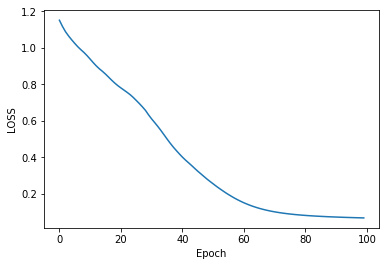

In [121]:
plt.plot(range(epochs), losses)
plt.ylabel("LOSS")
plt.xlabel("Epoch")

In [122]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [123]:
loss

tensor(0.0581)

In [124]:
correct = 0

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        
        print(f"{i+1}.)   {str(y_val.argmax().item())}   {y_test[i]}")
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f"We got {correct} correct!")

1.)   1   1
2.)   1   1
3.)   0   0
4.)   1   1
5.)   2   2
6.)   2   2
7.)   0   0
8.)   0   0
9.)   2   2
10.)   2   2
11.)   2   2
12.)   0   0
13.)   2   2
14.)   1   1
15.)   2   2
16.)   1   1
17.)   2   2
18.)   0   0
19.)   1   1
20.)   2   2
21.)   0   0
22.)   0   0
23.)   2   2
24.)   0   0
25.)   2   2
26.)   2   2
27.)   1   1
28.)   1   1
29.)   2   2
30.)   2   2
We got 30 correct!


In [125]:
torch.save(model.state_dict(), 'my_iris_model_saul.pt')

In [126]:
new_model = Model() # ?? W or B
new_model.load_state_dict(torch.load('my_iris_model_saul.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [127]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [128]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

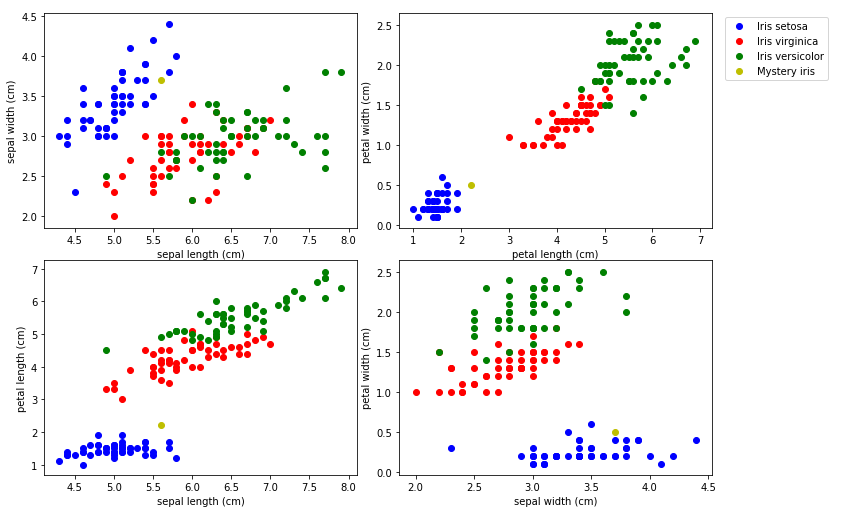

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [130]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([  5.9520,   1.5591, -10.0041])
tensor(0)
